In [3]:
import os
import gym
import numpy as np
os.environ['GYM_CONFIG_PATH'] = "config_test.py"
os.environ['GYM_CONFIG_CLASS'] = 'Train'
gym.logger.set_level(40)

from gym_collision_avoidance.envs import Config
from gym_collision_avoidance.model import agents_test

env = gym.make("CollisionAvoidance-v0")
agents = agents_test.get_agents_3()
[agent.policy.initialize_network() for agent in agents if hasattr(agent.policy, 'initialize_network')]
env.set_agents(agents)

obs = env.reset()

# print(obs[0])

# for key,value in obs.items():
#     print(f"key:{key}, value{value}")


In [12]:
actions = {}
actions[0] = np.array(2)
obs, rewards, game_over, which_agents_done = env.step(actions)

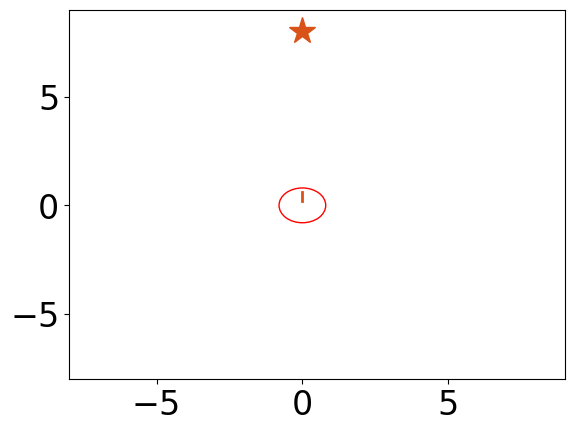

In [49]:
import matplotlib.pyplot as plt
from gym_collision_avoidance.envs.util import find_nearest, rgba2rgb, makedirs
figure, ax = plt.subplots()

plt.xlim(-8,9)
plt.ylim(-8,9)


plt_colors = []
plt_colors.append([0.8500, 0.3250, 0.0980])  # orange
plt_colors.append([0.0, 0.4470, 0.7410])  # blue
plt_colors.append([0.4660, 0.6740, 0.1880])  # green
plt_colors.append([0.4940, 0.1840, 0.5560])  # purple
plt_colors.append([0.9290, 0.6940, 0.1250])  # yellow
plt_colors.append([0.3010, 0.7450, 0.9330])  # cyan
plt_colors.append([0.6350, 0.0780, 0.1840])  # chocolate

a = agents[0].global_state_history[:agents[0].step_num, 1]  # 位置(全局坐标)
b = agents[0].global_state_history[:agents[0].step_num, 2]

plt.plot(a, b, color=plt_colors[0],ls='-', linewidth=2)

plt.plot(agents[0].global_state_history[0, 3],               # 目标位置
                     agents[0].global_state_history[0, 4],
                     color=plt_colors[0], marker='*', markersize=20)



circle_spacing = 0.2
circle_times = np.arange(0.0, agents[0].global_state_history[agents[0].step_num-1, 0], circle_spacing)
_, circle_inds = find_nearest(agents[0].global_state_history[:agents[0].step_num, 0],circle_times)



ax.add_patch(plt.Circle((0,0), 0.8, color='r', fill=False))


In [35]:
np.linspace(0, 3, 1)

array([0.])

In [4]:

pre_goal_postion = agents[0].get_agent_data("heading_ego_frame")
print(pre_goal_postion)

40.0
